<a href="https://colab.research.google.com/github/Bhagyashree-Bhattacharyya/Statistics/blob/main/PredictiveModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


***LINEAR REGRESSION***

Fabrication of a relation of a webpage speed & amount purchased

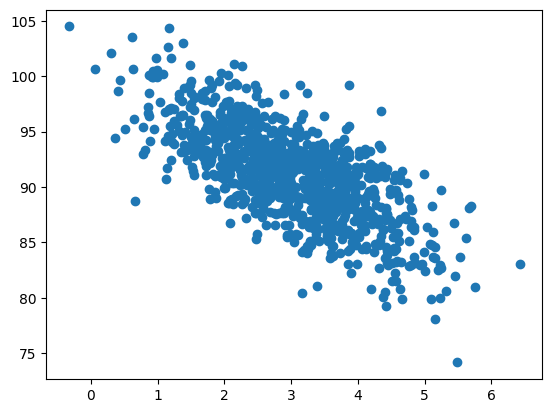

In [ ]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 1.0, 1000))*3  # some random relation

plt.scatter(pageSpeeds, purchaseAmount)

In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_error = stats.linregress(pageSpeeds, purchaseAmount)

In [ ]:
# r square
r_value**2

0.49691970057941853

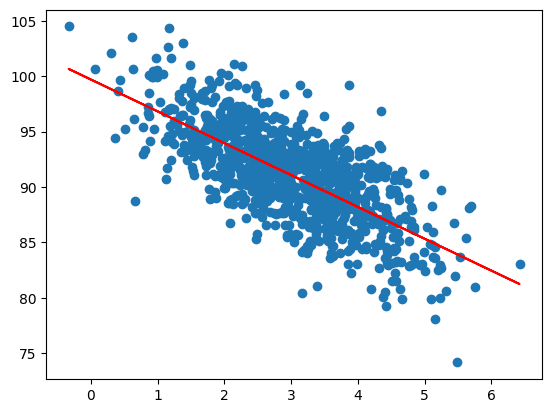

In [ ]:
def predict(x):
  return slope*x + intercept

fitLine = predict(pageSpeeds)
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

***POLYNOMIAL REGRESSION***

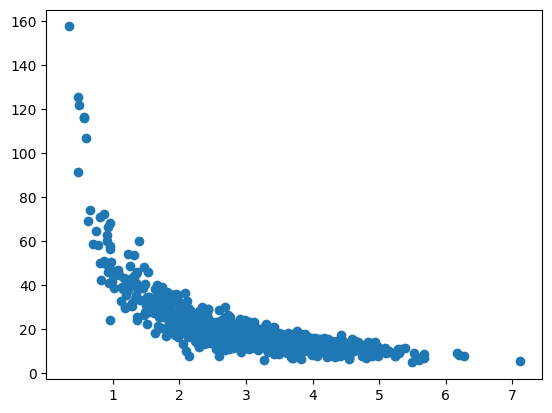

In [ ]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)/pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount)

In [ ]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

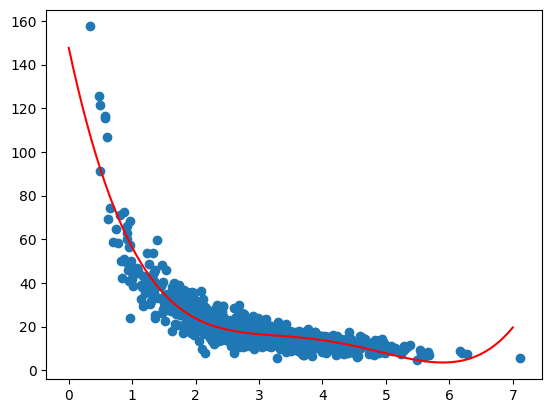

In [ ]:
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y, p4(x))
print (r2)

0.8293766396303073


***MULTIPLE REGRESSION***

In [ ]:
import pandas as pd
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


<Axes: xlabel='Mileage'>

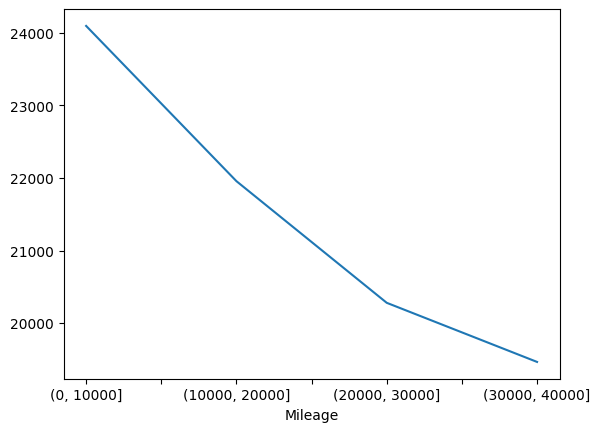

In [ ]:
%matplotlib inline
import numpy as np
df1=df[['Mileage', 'Price']]
bins = np.arange(0, 50000, 10000)
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()
print(groups.head())
groups['Price'].plot.line()

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

# a constant column as Y-intercept
X = sm.add_constant(X)

print(X)

     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]


<ipython-input-20-18ab7d0fb680>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


In [ ]:
est = sm.OLS(y, X).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.95e-77
Time:                        08:39:00   Log-Likelihood:                -8356.7
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     800   BIC:                         1.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.134e+04    279.405     76.388      0.0

In [ ]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [ ]:
scaled = scale.transform([[45000, 8, 4]])
scaled = np.insert(scaled[0], 0, 1)
print(scaled)

[1.         3.07256589 1.96971667 0.55627894]


In [ ]:
predicted = est.predict(scaled)
print(predicted)

[27658.15707316]


**TRAIN / TEST**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


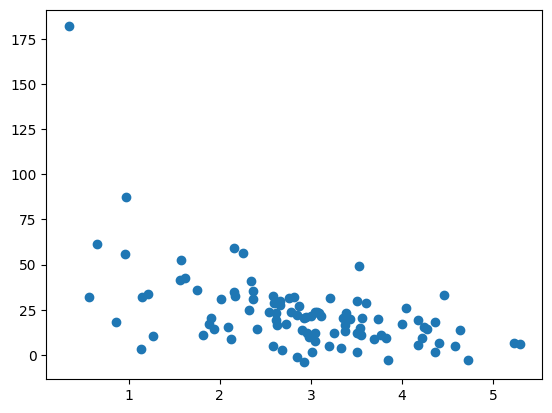

In [ ]:
np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100)/pageSpeeds  # some random relation

plt.scatter(pageSpeeds, purchaseAmount)

In [ ]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

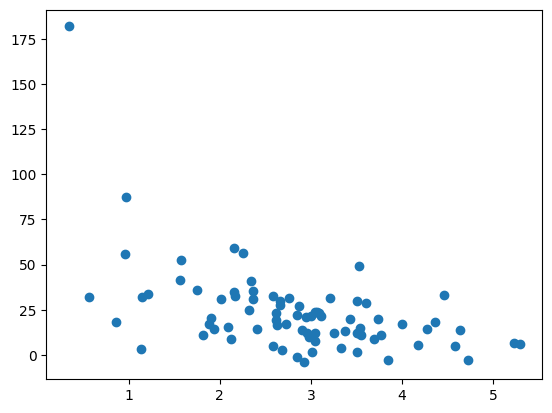

In [ ]:
plt.scatter(trainX, trainY)

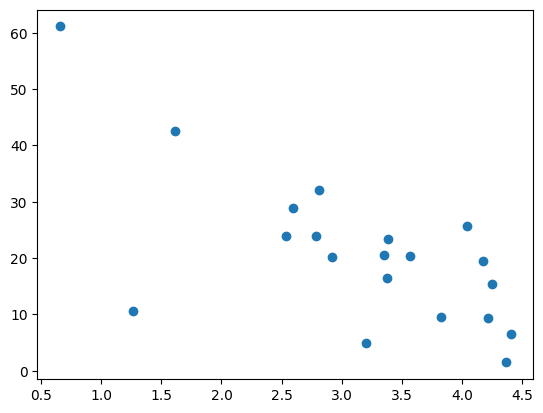

In [ ]:
plt.scatter(testX, testY)

In [ ]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x,y,8))

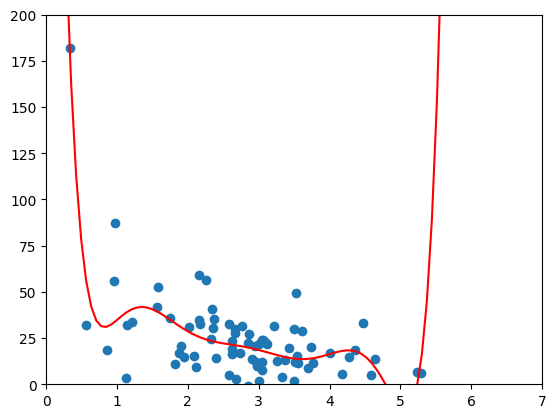

In [ ]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

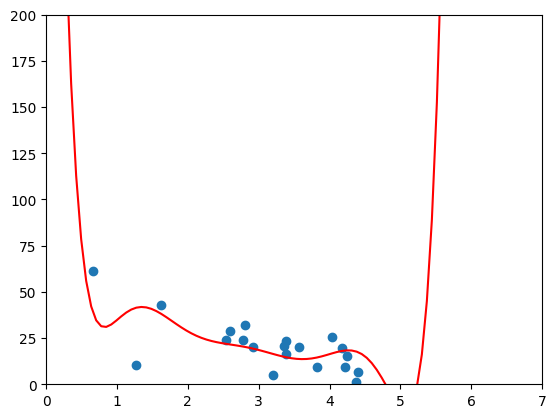

In [ ]:
x = np.array(testX)
y = np.array(testY)

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

print (r2_score(testY, p4(testX)))

0.30018168611498663


In [ ]:
from sklearn.metrics import r2_score

print (r2_score(trainY, p4(trainX)))

0.6427069514691666


**NAIVE BAYES**

In [1]:
import os
import io
import numpy as np
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [14]:
def readFiles(path):
  for root, dirnames, filenames in os.walk(path):
    for filename in filenames:
        path = os.path.join(root, filename)

        inBody = False
        lines = []
        f = io.open(path, 'r', encoding='latin1')
        for line in f:
          if inBody:
            lines.append('line')
          elif line=='\n':
            inBody = True
        f.close()
        message = '\n'.join(lines)
        yield path, message

In [15]:
def dataframeFromDictionary(path, classification):
  rows = []
  index = []
  for filename, message in readFiles(path):
    rows.append({'message': message, 'class': classification})
    index.append(filename)
  return DataFrame(rows, index = index)

In [16]:
data = DataFrame({'message': [], 'class': []})

data = data.append(dataframeFromDictionary('C:/Users/bhatt/Downloads/DataScience/DataScience-Python3/emails/spam' , 'spam'))
data = data.append(dataframeFromDictionary('C:/Users/bhatt/Downloads/DataScience/DataScience-Python3/emails/ham' , 'ham'))

<ipython-input-16-4eb1423a2090>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataframeFromDictionary('C:/Users/bhatt/Downloads/DataScience/DataScience-Python3/emails/spam' , 'spam'))
<ipython-input-16-4eb1423a2090>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataframeFromDictionary('C:/Users/bhatt/Downloads/DataScience/DataScience-Python3/emails/ham' , 'ham'))


made a dataframe

In [17]:
data.head()

,message,class
